In [1]:
import pandas as pd

# display 확장
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# train, valid, test file 경로 지정
file = './physionet2012_train.csv'
file2 = './physionet2012_valid.csv'
file3 = './physionet2012_test.csv'

# train data 로딩
df = pd.read_csv(file, index_col=None)
del df['Unnamed: 0']
df.head()

# valid data 로딩
valid_df = pd.read_csv(file2, index_col=None)
del valid_df['Unnamed: 0']
valid_df.head()

# tess data 로딩
test_df = pd.read_csv(file3, index_col=None)
del test_df['Unnamed: 0']
test_df.head()

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los
0,135089,0:00:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7
1,135089,0:44:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,2.9,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7
2,135089,2:09:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7
3,135089,2:10:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7
4,135089,2:15:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7


In [2]:
# 데이터 수와 환자 수 파악
print('총 데이터 수: {}'.format(len(df)))
print('총 환자 수: {}'.format(len(df.pid.unique())))

print('총 데이터 수: {}'.format(len(valid_df)))
print('총 환자 수: {}'.format(len(valid_df.pid.unique())))

print('총 데이터 수: {}'.format(len(test_df)))
print('총 환자 수: {}'.format(len(test_df.pid.unique())))


총 데이터 수: 242613
총 환자 수: 3240
총 데이터 수: 27097
총 환자 수: 360
총 데이터 수: 29554
총 환자 수: 400


In [ ]:
# dtype 파악
df.dtypes.value_counts()

In [ ]:
df.info()

In [ ]:
# null_ratio = 0.5
# over_05 = df.notnull().sum()[(df.notnull().sum() / len(df)) > null_ratio].map(lambda x: x / len(df))

# print(f"결측치 비율이 0.5 이상인 컬럼 수: {len(over_05)}")
# over_05
# over_columns = over_05.index
# print(over_columns)

# df2 = df[over_columns]
# df2.head()

## 1. 생존 유무 라벨링(0: survival, 1:death)
- Survival > Length of stay  ⇒  Survivor
- Survival = -1  ⇒  Survivor
- 2 ≤ Survival ≤ Length of stay  ⇒  In-hospital death

- surv-los > 0 => 0
- Survival = -1 => 0
- surv-los <= 0 => 1


In [3]:
import numpy as np

# train 데이터 생존 유무 라벨링
labels = np.zeros(len(df))
labels[df[(2 <= df.survival) & (df.surv_los <= 0)].index.to_list()] = 1
labels[df[df.surv_los > 0].index.to_list()] = 0
labels[df[df.survival == -1].index.to_list()] = 0
df['labels'] = labels

cnt = df[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()
print(f'num of survival: {cnt.iloc[0]} \n num of death: {cnt.iloc[1]}')

# valid data 생존 유무 라벨링
valid_labels = np.zeros(len(valid_df))
valid_labels[valid_df[(2 <= valid_df.survival) & (valid_df.surv_los <= 0)].index.to_list()] = 1
valid_labels[valid_df[valid_df.surv_los > 0].index.to_list()] = 0
valid_labels[valid_df[valid_df.survival == -1].index.to_list()] = 0
valid_df['labels'] = valid_labels

cnt = valid_df[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()
print(f'num of survival: {cnt.iloc[0]} \n num of death: {cnt.iloc[1]}')

# test data 생존 유무 라벨링
test_labels = np.zeros(len(test_df))
test_labels[test_df[(2 <= test_df.survival) & (test_df.surv_los <= 0)].index.to_list()] = 1
test_labels[test_df[test_df.surv_los > 0].index.to_list()] = 0
test_labels[test_df[test_df.survival == -1].index.to_list()] = 0
test_df['labels'] = test_labels

cnt = test_df[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()
print(f'num of survival: {cnt.iloc[0]} \n num of death: {cnt.iloc[1]}')

num of survival: 2813 
 num of death: 427
num of survival: 311 
 num of death: 49
num of survival: 348 
 num of death: 52


## 데이터 전처리 - 결측치 채우기
 - 1. fillna(method='ffill')
 - 2. fillna(컬럼별 median)
 - 3. 의문점1) 결측치 비율이 0.5가 넘는 컬럼도 무리하게 결측치를 채워 사용해도 되는가?
 - 4. 의문점2) method='ffill'을 사용하면 다른 pid의 컬럼 내용을 가져올 리는 없는가?

### 

- 제일 첫 값이 nun -> median
- 그 다음에 fillna(ffill)
- fillna(bfill)은 쓰면 안됨!!

In [ ]:
# dropna method 연습
test = pd.DataFrame([[1,1,np.nan],
                     [2,2,np.nan],
                     [np.nan, 3, np.nan],
                     [np.nan,4,4],
                     [5,5,5],
                     [np.nan, np.nan, np.nan]])
print(test)
test2 = test.fillna(method='ffill', axis=1)
print(test2)                    

In [ ]:
df.columns

In [4]:
first_index = df.drop_duplicates('pid').index
first_indext = test_df.drop_duplicates('pid').index
first_indexv= valid_df.drop_duplicates('pid').index

colss=df.columns
cols=[]
for i in range (2,colss.size):
  cols.append(colss[i])
# 중앙값 구하기
median_dict={}
for col in cols:
  median_dict[col] = df[col].median()  
median_dict

C:\Users\SMHRD\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\SMHRD\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{'age': 67.0,
 'Gender': 1.0,
 'ICUType': 3.0,
 'ALP': 82.0,
 'ALT': 43.0,
 'AST': 63.0,
 'Albumin': 2.9,
 'BUN': 20.0,
 'Bilirubin': 0.9,
 'Cholesterol': 154.0,
 'Creatinine': 1.0,
 'FiO2': 0.5,
 'GCS': 13.0,
 'Glucose': 127.0,
 'HCO3': 23.0,
 'HCT': 30.3,
 'HR': 86.0,
 'K': 4.1,
 'Lactate': 2.1,
 'Mg': 2.0,
 'Na': 139.0,
 'PaCO2': 39.0,
 'PaO2': 122.0,
 'Platelets': 173.0,
 'RR': 19.0,
 'SPO2': 97.0,
 'BT': 37.1,
 'Tropl': nan,
 'TroponinI': 2.9,
 'TropT': nan,
 'TroponinT': 0.22,
 'Urine': 70.0,
 'WBC': 11.5,
 'pH': 7.38,
 'MechVent': 1.0,
 'survival': -1.0,
 'SBP': 116.0,
 'DBP': 58.0,
 'MBP': 77.0,
 'male': 1.0,
 'female': 0.0,
 'surv_los': -7.0,
 'labels': 0.0}

In [5]:
# 결측치 채우기 
df3 = df.copy()
# train 데이터
for col in cols:
  # 첫번째 인덱스가 0이 아닌경우 먼저 중앙값으로 결측치 채우기
    for i in first_index:
        if np.isnan(df3.loc[i,col])==True:
            df3.loc[i, col] = median_dict[col]
 # 환자별 컬럼별로 만약 np.nan이 존재한다면, 이전 데이터의 값을 가지고 채운다. method='ffill
    df3[col] =df3[col].fillna(method='ffill')

valid_df3 = valid_df.copy()
# valid 데이터
for col in cols:
    for i in first_indexv:
        if np.isnan(valid_df3.loc[i,col])==True:
            valid_df3.loc[i, col] = median_dict[col]
    valid_df3[col] = valid_df3[col].fillna(method='ffill')

test_df3 = test_df.copy()
# test 데이터
for col in cols:
    for i in first_indext:
        if np.isnan(test_df3.loc[i,col])==True:
            test_df3.loc[i, col] = median_dict[col]
    test_df3[col] = test_df3[col].fillna(method='ffill')

In [ ]:
# 데이터 개수와 컬럼별 null 개수 확인
print(len(df3))
pd.DataFrame(df3.isnull().sum())

print(len(valid_df3))
pd.DataFrame(valid_df3.isnull().sum())

print(len(test_df3))
pd.DataFrame(test_df3.isnull().sum())

In [7]:
# 데이터가 단 하나도 없는 column 'Tropl', 'TropT' 제외
# 'rec_time'은 이후 padding에서 np.zeros에 string 데이터가 들어갈 수 없는 문제를 해결하기 위해 미리 제거
df4 = df3.drop(columns=['Tropl', 'TropT', 'rec_time'])
pd.DataFrame(df4.isnull().sum())

valid_df4 = valid_df3.drop(columns=['Tropl', 'TropT', 'rec_time'])
pd.DataFrame(valid_df4.isnull().sum())

test_df4 = test_df3.drop(columns=['Tropl', 'TropT', 'rec_time'])
pd.DataFrame(test_df4.isnull().sum())

,0
pid,0
age,0
Gender,0
ICUType,0
ALP,0
ALT,0
AST,0
Albumin,0
BUN,0
Bilirubin,0


In [ ]:
test_df4

## 3. zero-padding
- maxlen 보다 적은 수의 데이터를 가진 환자들은 zero-padding으로 데이터를 채워넣는다.
- maxlen 보다 큰 수의 데이터는 maxlen 크기만큼 데이터를 자른다.
- maxlen = 70
- pre-zero-padding
- np.zeros에 string이 들어갈 수 없기 때문에 rec_time column을 제외시키자.(앞선 코드에서 적용함.)
- 여전히 남은 의문점: 측정되지 않았다고 모든 컬럼에 0.0을 넣어도 될까? 실제 그 수치가 아닐 수도 있는데? 모르는 것과 없는 것은 다를텐데 이를 어떻게 이해해야 할지.

In [8]:

maxlen = 70
# zero-padding 함수
def zero_padding(dataframe, maxlen):
    maxlen = maxlen
    df4 = dataframe
    col_len = len(df4.columns)
    data = []
    # 기본정보는 zero_padding에 모두 동일하게 적용되어야 함으로 따로 취급한다. 나머지는 모두 0.0으로 채운다.
    basic_col = 'pid, age, Gender, ICUType, survival, male, female, surv_los, labels'
    basic_col_list = basic_col.split(', ')
    basic_col_indexer = df4.columns.get_indexer(basic_col_list)
    basic_col_indexer

    for pid in df4.pid.drop_duplicates().to_numpy():
        if len(df4[df4.pid == pid]) >= maxlen:
            dummy = df4[df4.pid == pid].to_numpy().tolist()
            data.append(dummy[:maxlen])
        else:
            length = len(df4[df4.pid == pid])
            base = np.zeros((maxlen, col_len))
            for idx in basic_col_indexer:
                base[:, idx] = df4[df4.pid == pid].iloc[0, idx]
            # print(base.shape)
            dummy = df4[df4.pid == pid].to_numpy()
            # print(dummy.shape)
            base[-length:] = dummy
            # print(base.shape)
            # base[:length, 0] = pid
            # base[:length, -1] = dummy[0, -1] 
            data.append(base.tolist())
    return data

data = zero_padding(df4, maxlen)
valid_data = zero_padding(valid_df4, maxlen)
test_data = zero_padding(test_df4, maxlen)


In [9]:
# zero_padding 결과는 list 형식의 3차원 데이터(참고로 리스트에는 차원이 없지만 쉬운 이해를 위해 차원이라 함.)
# train 데이터 결과를 dataframe으로 변환
data = np.array(data)
data = data.reshape((-1, len(df4.columns)))
df5 = pd.DataFrame(data, columns=df4.columns)
# train data 환자 수: 3240
print(3240* 70, len(df5))
df5

valid_data = np.array(valid_data)
valid_data = valid_data.reshape((-1, len(valid_df4.columns)))
valid_df5 = pd.DataFrame(valid_data, columns=valid_df4.columns)
# valid data 환자 수: 360
print(360* 70, len(valid_df5))
valid_df5

test_data = np.array(test_data)
test_data = test_data.reshape((-1, len(test_df4.columns)))
test_df5 = pd.DataFrame(test_data, columns=df4.columns)
# test
# data 환자 수: 400
print(400* 70, len(test_df5))
test_df5

226800 226800
25200 25200
28000 28000


,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,labels
0,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,0.0
1,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,0.0
2,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,0.0
3,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,0.0
4,135089.0,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,135219.0,78.0,0.0,4.0,82.0,43.0,63.0,2.9,14.0,0.9,154.0,1.4,0.5,15.0,117.0,22.0,30.4,59.0,4.3,2.1,1.8,131.0,40.0,122.0,144.0,22.0,98.0,37.6,2.9,0.22,35.0,11.9,7.35,1.0,2011.0,134.0,51.0,79.0,1.0,0.0,2002.0,0.0
27996,135219.0,78.0,0.0,4.0,82.0,43.0,63.0,2.9,14.0,0.9,154.0,1.4,0.5,15.0,117.0,22.0,30.4,60.0,4.3,2.1,1.8,131.0,40.0,122.0,144.0,22.0,98.0,37.6,2.9,0.22,35.0,11.9,7.35,1.0,2011.0,132.0,50.0,78.0,1.0,0.0,2002.0,0.0
27997,135219.0,78.0,0.0,4.0,82.0,43.0,63.0,2.9,14.0,0.9,154.0,1.4,0.5,15.0,117.0,22.0,30.4,66.0,4.3,2.1,1.8,131.0,40.0,122.0,144.0,18.0,98.0,37.7,2.9,0.22,45.0,11.9,7.35,1.0,2011.0,139.0,54.0,84.0,1.0,0.0,2002.0,0.0
27998,135219.0,78.0,0.0,4.0,82.0,43.0,63.0,2.9,14.0,0.9,154.0,1.4,0.5,15.0,117.0,22.0,30.4,66.0,4.3,2.1,1.8,131.0,40.0,90.0,144.0,18.0,98.0,37.7,2.9,0.22,45.0,11.9,7.37,1.0,2011.0,139.0,54.0,84.0,1.0,0.0,2002.0,0.0


In [10]:
# train 데이터의 생존자 수와 사망자 수 확인
df5.shape
df5.pid.value_counts()
df5[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()

valid_df5.shape
valid_df5.pid.value_counts()
valid_df5[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()

test_df5.shape
test_df5.pid.value_counts()
test_df5[['pid', 'labels']].drop_duplicates(['pid'])['labels'].value_counts()

labels
0.0    348
1.0     52
Name: count, dtype: int64

## 4. Normalization
- 기본 정보, categorical(숫자로 되어 있지만 명목 변수)은 정규화 대상에서 제외
- minmax scaler를 활용함.

In [ ]:
df5.columns

In [ ]:
#!pip install scikit-learn

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
df5_1= df5.drop(columns=['pid','age','Gender','ICUType' , 'male', 'female','survival', 'surv_los', 'labels'])
test_df5_1 = test_df5.drop(columns=['pid','age','Gender','ICUType' , 'male', 'female','survival', 'surv_los', 'labels'])
valid_df5_1 = valid_df5.drop(columns=['pid','age','Gender','ICUType' , 'male', 'female','survival', 'surv_los', 'labels'])
scaler = MinMaxScaler()

scale = MinMaxScaler()
scale.fit(df5_1)
df5_2 = scale.transform(df5_1)
test_df5_2 = scale.transform(test_df5_1)
valid_df5_2 = scale.transform(valid_df5_1)

column_names = df5_1.columns
df5_2 = pd.DataFrame(df5_2, columns=column_names)
test_df5_2 = pd.DataFrame(test_df5_2, columns=column_names)
valid_df5_2 = pd.DataFrame(valid_df5_2, columns=column_names)

df5_2.insert(0, 'pid', df5['pid'])
df5_2.insert(1, 'age', df5['age'])
df5_2.insert(2, 'Gender', df5['Gender'])
df5_2.insert(3, 'ICUType', df5['ICUType'])
df5_2['male'] = df5['male']
df5_2['female'] = df5['female']
df5_2['survival'] = df5['survival']
df5_2['surv_los'] = df5['surv_los']
df5_2['labels'] = df5['labels']

test_df5_2.insert(0, 'pid', test_df5['pid'])
test_df5_2.insert(1, 'age', test_df5['age'])
test_df5_2.insert(2, 'Gender', test_df5['Gender'])
test_df5_2.insert(3, 'ICUType', test_df5['ICUType'])
test_df5_2['male'] = test_df5['male']
test_df5_2['female'] = test_df5['female']
test_df5_2['survival'] = test_df5['survival']
test_df5_2['surv_los'] = test_df5['surv_los']
test_df5_2['labels'] = test_df5['labels']

valid_df5_2.insert(0, 'pid', valid_df5['pid'])
valid_df5_2.insert(1, 'age', valid_df5['age'])
valid_df5_2.insert(2, 'Gender', valid_df5['Gender'])
valid_df5_2.insert(3, 'ICUType', valid_df5['ICUType'])
valid_df5_2['male'] = valid_df5['male']
valid_df5_2['female'] = valid_df5['female']
valid_df5_2['survival'] = valid_df5['survival']
valid_df5_2['surv_los'] = valid_df5['surv_los']
valid_df5_2['labels'] = valid_df5['labels']

In [13]:
df5 = df5_2
test_df5 = test_df5_2
valid_df5 = valid_df5_2

In [ ]:
df5.head()

<Axes: xlabel='ICUType'>

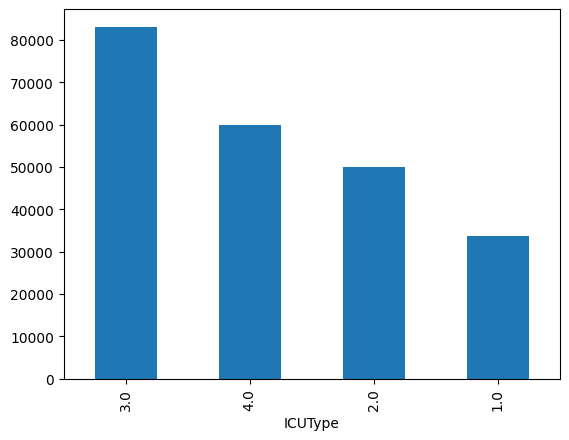

In [14]:
import matplotlib.pyplot as plt

bins = [i for i in range(1, 100, 5)]
cats = pd.cut(df5.age, bins, labels=bins[:-1])
cats.value_counts().plot.bar()

icu_type = {1.: '관상동맥치료실', 2.: '심장수술회복실', 3.: '의료ICU', 4.: '외과ICU'}
df5.ICUType.value_counts().plot.bar()

In [ ]:
# y = df3.labels.copy()
# X = df3.drop(columns=['labels'])
# for i, col in enumerate(X.columns):
#     X[col] = (X[col] - X[col].mean()) / X[col].std()
#     # print(i)

In [15]:
# # Gender 중에 -1 값을 갖는 pid가 3개 있음.
# print(df5[df5.Gender == -1.]['pid'].unique())

# # 확인 결과 Gender {1:'male', 0:'female'}
# print(df5[df5.Gender == 1]['male'])

# # 확인 결과, Gender==-1은 male 인 것으로 판단되어 -1을 1로 치환함. 
# print(df5.Gender.value_counts())
# # print(pd.DataFrame(df5[df5.Gender == -1]['female']))
# print(pd.DataFrame(df5[df5.Gender == -1]['male']))

df5.Gender.replace({-1.:1.0}, inplace=True)
df5.Gender.value_counts()

Gender
1.0    127470
0.0     99330
Name: count, dtype: int64

In [ ]:
df5

In [16]:
# 'ICUType' 원-핫 인코딩
df6 = pd.get_dummies(df5, columns=['ICUType'])
print(len(df5.columns))
print(len(df6.columns))
print('ICUType' in df6.columns)

valid_df6 = pd.get_dummies(valid_df5, columns=['ICUType'])
# print(len(valid_df5.columns))
# print(len(valid_df6.columns))
# print('ICUType' in valid_df6.columns)

test_df6 = pd.get_dummies(test_df5, columns=['ICUType'])
# print(len(test_df5.columns))
# print(len(test_df6.columns))
# print('ICUType' in test_df6.columns)

42
45
False


In [17]:
# labels 컬럼 인덱스 찾기
inx = test_df6.columns.get_indexer(['labels'])
print(inx)

# X, y 분리
y_train = df6['labels']
X_train= df6.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'labels'])
X_train = X_train.astype(float)
print(y_train.shape)
print(X_train.shape)

y_valid = valid_df6['labels']
X_valid= valid_df6.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'labels'])
X_valid = X_valid.astype(float)
print(y_valid.shape)
print(X_valid.shape)

y_test = test_df6['labels']
X_test= test_df6.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'labels'])
X_test = X_test.astype(float)
print(y_test.shape)
print(X_test.shape)

[40]
(226800,)
(226800, 40)
(25200,)
(25200, 40)
(28000,)
(28000, 40)


- X = tensor (batch_size * seq_len * dim)
- Y = tensor (batch_size * 1)

loss_func = binary cross entropy
model = LSTM, GRU

mews, news, sofa, apache-2

결론 : AUROC가 rule-based 알고리즘들보다 더 잘나와야함

In [41]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [45]:
# Create the Sequential model
model = Sequential()


Earlystopping = EarlyStopping(monitor='val_loss',  patience=10)      

# Add the embedding layer
# model.add(Embedding(input_dim, output_dim, input_length=input_length))
model.add(Embedding(226800, 128))

# Add the Bidirectional LSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         29030400  
                                                                 
 bidirectional_9 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_10 (Bidirecti  (None, None, 256)        394240    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 256)             

In [46]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [47]:
# Training
model.fit(X_train, y_train, epochs=100, batch_size=70, validation_data=(X_valid, y_valid), callbacks=[Earlystopping])

Epoch 1/100
3240/3240 [==============================] - 116s 34ms/step - loss: 0.3958 - accuracy: 0.8682 - val_loss: 0.3980 - val_accuracy: 0.8639
Epoch 2/100
3240/3240 [==============================] - 109s 34ms/step - loss: 0.3901 - accuracy: 0.8682 - val_loss: 0.3979 - val_accuracy: 0.8639
Epoch 3/100
3240/3240 [==============================] - 109s 33ms/step - loss: 0.3901 - accuracy: 0.8682 - val_loss: 0.3980 - val_accuracy: 0.8639
Epoch 4/100
3240/3240 [==============================] - 108s 33ms/step - loss: 0.3899 - accuracy: 0.8682 - val_loss: 0.3984 - val_accuracy: 0.8639
Epoch 5/100
3240/3240 [==============================] - 109s 34ms/step - loss: 0.3899 - accuracy: 0.8682 - val_loss: 0.3978 - val_accuracy: 0.8639
Epoch 6/100
3240/3240 [==============================] - 109s 34ms/step - loss: 0.3899 - accuracy: 0.8682 - val_loss: 0.3980 - val_accuracy: 0.8639
Epoch 7/100
3240/3240 [==============================] - 111s 34ms/step - loss: 0.3899 - accuracy: 0.8682 - val_

In [48]:
# evaluate
model.evaluate(X_test, y_test)

875/875 [==============================] - 19s 19ms/step - loss: 0.3757 - accuracy: 0.8700


[0.37570950388908386, 0.8700000047683716]

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
pre = model.predict(X_test)

875/875 [==============================] - 16s 17ms/step


In [51]:
roc_auc_score(y_test, pre)

0.6275890996318951

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

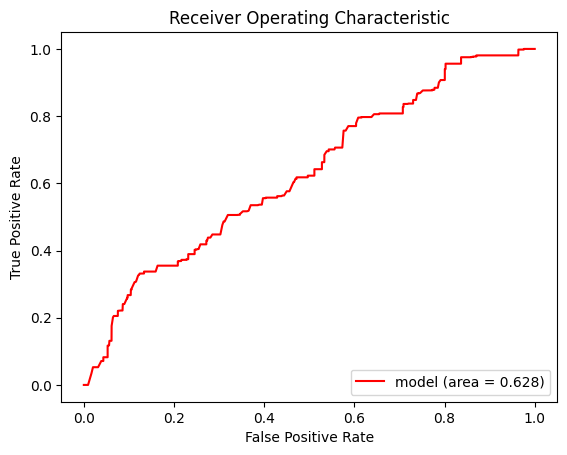

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, pre)
roc_auc = auc(fpr, tpr)
# Step 5: Plot the ROC curve
plt.plot(fpr, tpr, color='r', label='model (area = %0.3f)' % roc_auc)
# Step 6: Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Step 7: Show the plot
plt.show()

In [54]:
 test_df6['pre'] = pre
 test_df6['pre_max'] = test_df6.groupby('pid')['pre'].transform(np.max)

In [55]:
pre_max = test_df6['pre_max']

In [ ]:
pre_max

In [56]:
roc_auc_score(y_test, pre_max)

0.6047469053934571

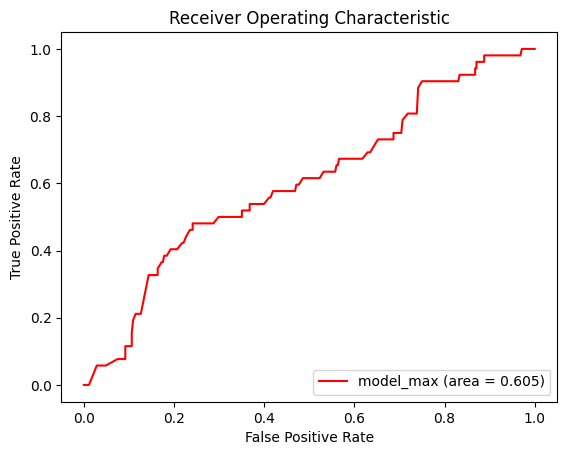

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, pre_max)
roc_auc = auc(fpr, tpr)
# Step 5: Plot the ROC curve
plt.plot(fpr, tpr, color='r', label='model_max (area = %0.3f)' % roc_auc)
# Step 6: Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Step 7: Show the plot
plt.show()

In [58]:
test_df6['pre_mean'] = test_df6.groupby('pid')['pre'].transform(np.mean)

In [59]:
pre_mean = test_df6['pre_mean']

In [38]:
pre_mean

0        0.144857
1        0.144857
2        0.144857
3        0.144857
4        0.144857
           ...   
27995    0.066555
27996    0.066555
27997    0.066555
27998    0.066555
27999    0.066555
Name: pre_mean, Length: 28000, dtype: float32

In [60]:
roc_auc_score(y_test, pre_mean)

0.6352232537577366

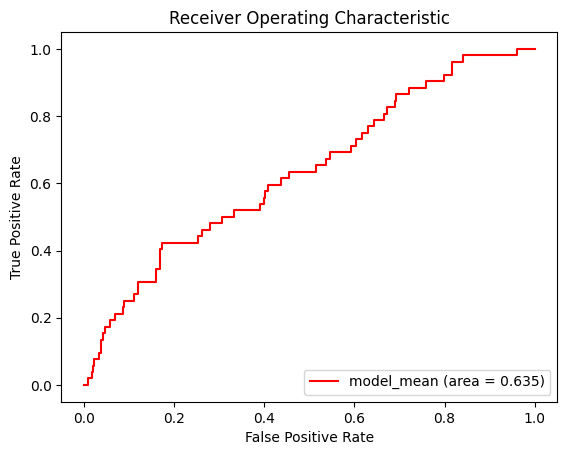

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, pre_mean)
roc_auc = auc(fpr, tpr)
# Step 5: Plot the ROC curve
plt.plot(fpr, tpr, color='r', label='model_mean (area = %0.3f)' % roc_auc)
# Step 6: Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Step 7: Show the plot
plt.show()